In [1]:
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

### Bike Share Daily Data
<b> Dataset</b>: https://www.kaggle.com/contactprad/bike-share-daily-data#bike_sharing_daily.csv

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
bikesharing_data = pd.read_csv('datasets/bike_sharing_daily.csv', index_col=0)

bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bikesharing_data.shape

(731, 15)

In [5]:
bikesharing_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [6]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

#### Describing the data

In [7]:
bikesharing_data[['temp', 'atemp', 'hum', 'windspeed', 'casual',
                  'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Positive Correlation

#### Finding correlation
* finding correlation between registered users and temperature
* And we can see the correlation between the registered and temperature is high.

#### Using numpy

* Using numpy we can find that, the correlation values between temp and registered

In [8]:
np.corrcoef(bikesharing_data['temp'], 
            bikesharing_data['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

#### Using pandas

* Using pandas also we can find the correlation values

In [9]:
bikesharing_data['temp'].corr(bikesharing_data['cnt'])

0.6274940090334918

#### Using Pearson's correlation

<b>Pearson's and spearmanr correlation:</b> https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

* Pearson's also one of the method, to find the correlation values.
* This is the method using stats

In [10]:
pearsonr(bikesharing_data['temp'], 
         bikesharing_data['cnt'])

(0.627494009033492, 2.8106223975907754e-81)

#### Using Spearman’s Correlation

* Spearman also a stats method, to find the correlation values. 

In [11]:
spearmanr(bikesharing_data['temp'], 
          bikesharing_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

* Let's check how the plot will come out for the relationship between temperature and registered user.
* Here we can see, whatever the temperature is, people used to register and go for it
* Here we can see this is a linear relationship also

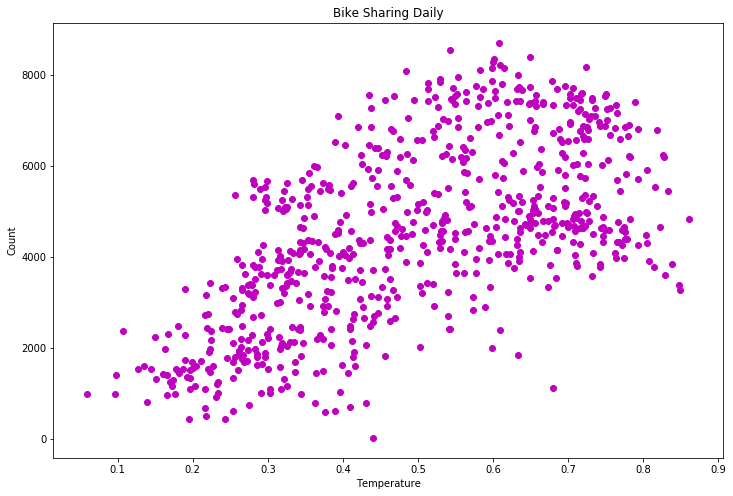

In [12]:
plt.figure(figsize=(12, 8))

plt.scatter(bikesharing_data['temp'], 
            bikesharing_data['cnt'], color='m')

plt.title('Bike Sharing Daily')

plt.xlabel('Temperature')
plt.ylabel('Count')

plt.show()

* Here also we can see, casual and temperature, This is also positively correlated

#### Using numpy

In [13]:
np.corrcoef(bikesharing_data['workingday'], 
            bikesharing_data['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

#### Using pandas

In [14]:
bikesharing_data['workingday'].corr(bikesharing_data['registered'])

0.3039071170459171

#### Using Pearson's correlation

In [15]:
pearsonr(bikesharing_data['workingday'], 
         bikesharing_data['registered'])

(0.30390711704591733, 4.3815710893705565e-17)

#### Using Spearman’s Correlation

In [16]:
spearmanr(bikesharing_data['workingday'], 
          bikesharing_data['registered'])

SpearmanrResult(correlation=0.3058584564758216, pvalue=2.6994118569378256e-17)

* From this we can see that, whoever has registered they cannot change it. So in the working day also, count of registered user is high.

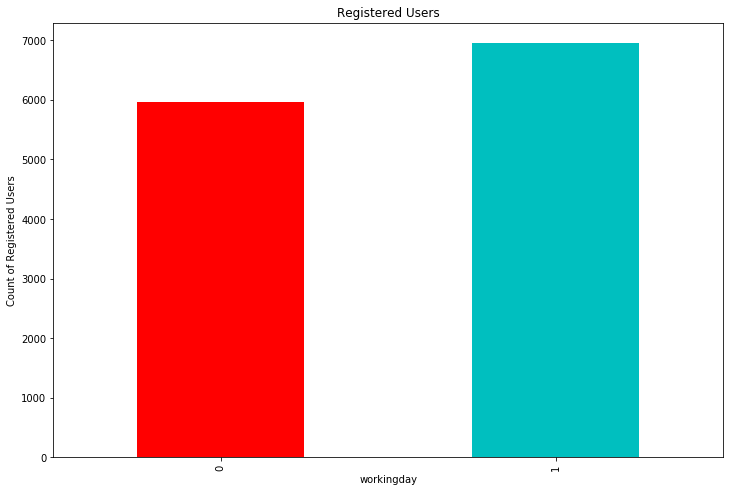

In [17]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['registered'].plot(kind='bar',
                                                                figsize=(12,8), 
                                                                ax = ax, 
                                                                color=['r', 'c'])

plt.title('Registered Users')
plt.ylabel('Count of Registered Users')

plt.show()

* Here it is very normal that, on holidays people used to check the availability of bikes, and they used to book it. Because of that the count of casual users on holidays are high

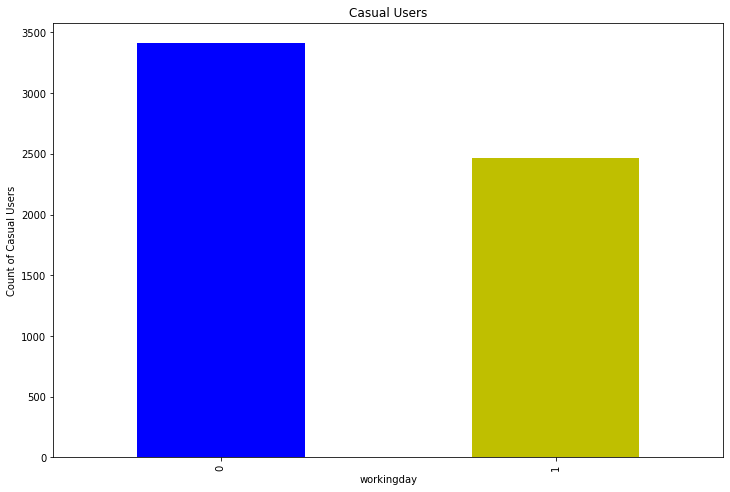

In [18]:
ax = plt.subplot()

bikesharing_data.groupby('workingday').max()['casual'].plot(kind='bar',
                                                            figsize=(12,8), 
                                                            ax = ax, 
                                                            color=['b', 'y'])

plt.title('Casual Users')
plt.ylabel('Count of Casual Users')

plt.show()

## Negative Correlation

* Here we can see how humidity and count of the total bike rentals are correlated. This is also negatively correlated. When the humidity is increasing 

#### Using numpy

In [19]:
np.corrcoef(bikesharing_data['windspeed'], 
            bikesharing_data['cnt'])

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

#### Using pandas

In [20]:
bikesharing_data['windspeed'].corr(bikesharing_data['cnt'])

-0.23454499742167

#### Using Pearson's correlation

In [21]:
pearsonr(bikesharing_data['windspeed'], 
         bikesharing_data['cnt'])

(-0.23454499742167, 1.3599586778869642e-10)

#### Using Spearman’s Correlation

In [22]:
spearmanr(bikesharing_data['windspeed'], 
          bikesharing_data['cnt'])

SpearmanrResult(correlation=-0.21719701027268842, pvalue=2.9694272867448183e-09)

* Let's plot and see how the plot for the above negative correlation. From here you can see, humidity is high then count of the total bike rentals is less

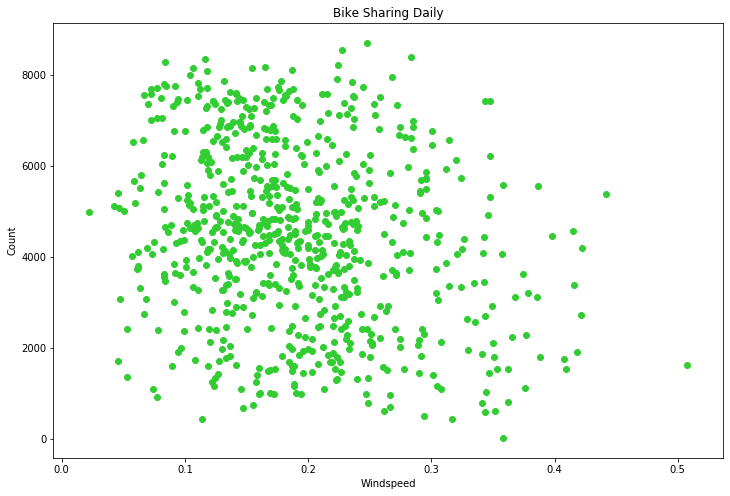

In [23]:
plt.figure(figsize=(12, 8))

plt.scatter(bikesharing_data['windspeed'], 
            bikesharing_data['cnt'], color='limegreen')

plt.title('Bike Sharing Daily')
plt.ylabel('Count')
plt.xlabel('Windspeed')

plt.show()

* From the data, let's check how many workingday category is there, From the below operations we will be able to understand working days are two categories 
    * 0 - Working day
    * 1 - Holiday

In [24]:
categories = bikesharing_data['workingday'].unique()

categories

array([0, 1])

* According to the working day, let's check it out holidays or working day has more count of bike rentals
* Here the holidays are green color, So you can see count of bike rentals are high on working day, and count of bike rentals in holidays are less

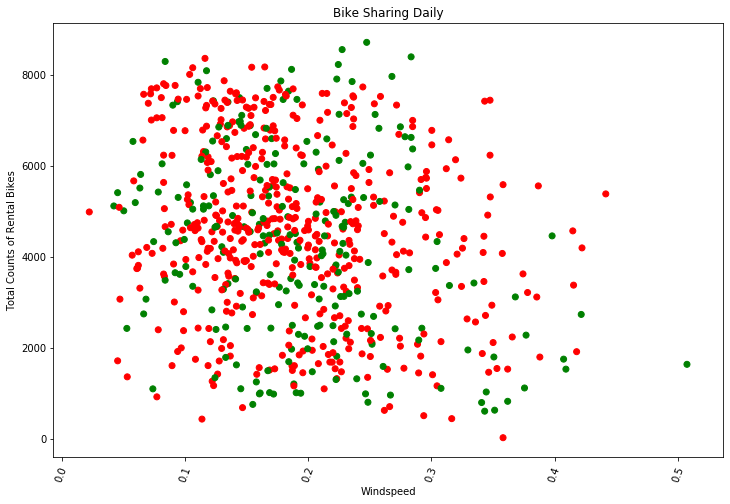

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.xticks(rotation=70)

colors = {categories[0]:'green', categories[1]:'red'}

ax.scatter(bikesharing_data['windspeed'], bikesharing_data['cnt'], 

           c=bikesharing_data['workingday'].apply(lambda x: colors[x]))

plt.title('Bike Sharing Daily')
plt.xlabel('Windspeed')
plt.ylabel('Total Counts of Rental Bikes')

plt.show()

* Let's plot and see, how will be the plot for the relationship between temperature and windspeed

#### Correlation Matrix
* Let's see the correlation matrix and see the relationship between each variable

In [26]:
bikesharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


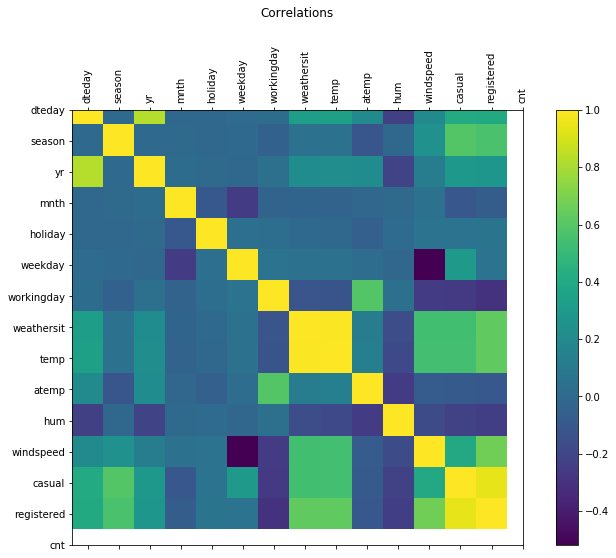

In [32]:
plt.figure(figsize=(12, 8))

plt.matshow(bikesharing_data.corr(), 
            fignum=False, 
            aspect='equal')

columns = len(bikesharing_data.columns)

plt.xticks(range(columns), bikesharing_data.columns)
plt.yticks(range(columns), bikesharing_data.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [33]:
!pip install yellowbrick

In [38]:
target = bikesharing_data['cnt']

features = bikesharing_data.drop(['casual', 'registered', 'cnt', 'dteday'], axis=1)

In [39]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

feature_names

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

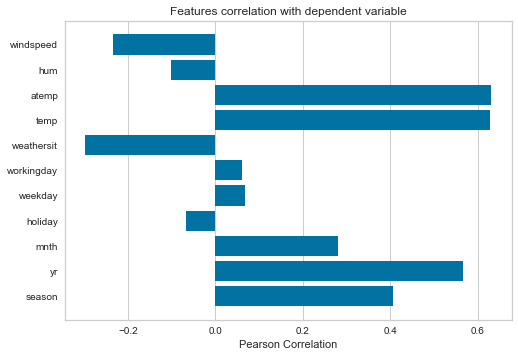

In [40]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()